### Coincidencia de patrones

In [289]:
#%matplotlib qt

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [290]:
def load_images(image_path):
    img = cv.imread(image_path)

    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template = cv.imread('./material/template/pattern.png',0)

    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(template, cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(img_rgb)
    plt.subplot(1,3,3)
    plt.imshow(img_gray)


    #print(f'template shape: {template.shape}')
    #print(f'img_gray shape: {img_gray.shape}')
    return img,template,img_rgb,img_gray

def template_resize(template,img):
    w, h = template.shape[::-1]
    h_image, w_image = img.shape[:2]
    redim=0
    if w > w_image or h > h_image:
        redim=1
        factor_escala = min(w_image / w, h_image / h)
        w = int(w * factor_escala)
        h = int(h * factor_escala)
        template = cv.resize(template, (w, h))
    return redim,w,h,template

def match_template(template,redim,h,w,img_rgb,img_gray):
    img_salida = img_rgb.copy()
    method = eval('cv.TM_CCOEFF')
    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    top_left = max_loc

    if redim:
       top_left = (top_left[0], top_left[1] + h)
 
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img_salida,top_left, bottom_right, 0, 2)

    plt.figure()
    plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle('cv.TM_CCOEFF')
    plt.show()
    


In [291]:
def main_tm_ccoeff(image_path):
    img,template,img_rgb,img_gray=load_images(image_path)
    print(image_path)
    redim,w,h,template=template_resize(template,img)
    print(redim)
    match_template(template,redim,h,w,img_rgb,img_gray)

./material/images/coca_logo_1.png
1


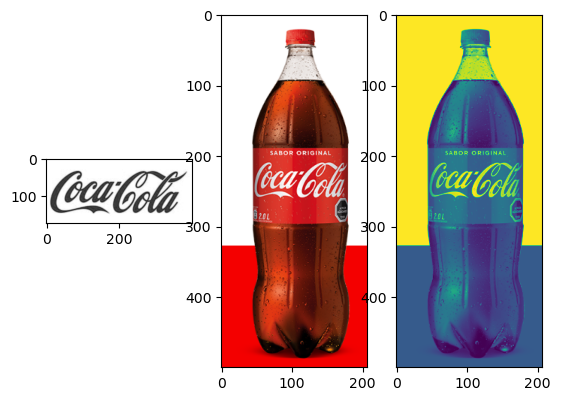

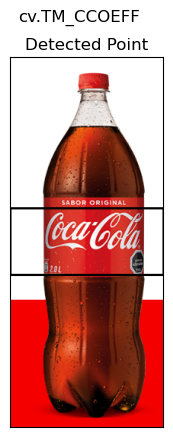

./material/images/coca_logo_2.png
1


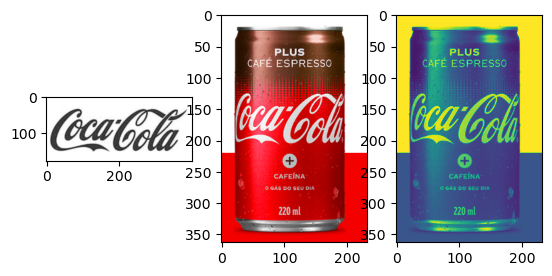

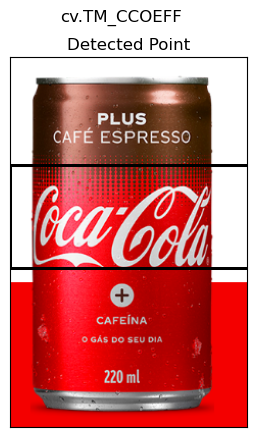

./material/images/coca_retro_1.png
0


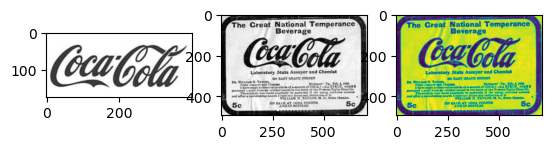

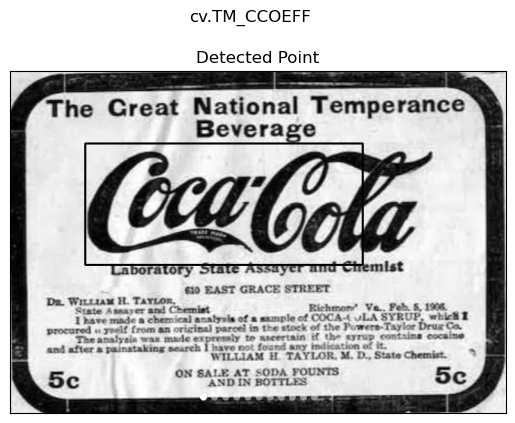

In [292]:
main_tm_ccoeff('./material/images/coca_logo_1.png')
main_tm_ccoeff('./material/images/coca_logo_2.png')
main_tm_ccoeff('./material/images/coca_retro_1.png')



In [296]:
# Cargar el template y la imagen en color
template = cv.imread('./material/template/pattern.png')
imagen = cv.imread('./material/images/COCA-COLA-LOGO.jpg')

orb = cv.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(template, None)
keypoints2, descriptors2 = orb.detectAndCompute(imagen, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = [m for m in matches if m.distance < 44]
img_matches = cv.drawMatches(template, keypoints1, imagen, keypoints2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
image_resize = cv.resize(img_matches, (img_matches.shape[1] // 2, img_matches.shape[0] // 2)) 
cv.imshow('Resultado', image_resize)
cv.waitKey(0)
cv.destroyAllWindows()


#### 2. Coincidencia de patrones con objetos múltiples

In [320]:
import cv2 as cv
import numpy as np

# Cargar la imagen y la plantilla
img_rgb = cv.imread('./material/images/coca_multi.png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('./material/template/pattern.png', 0)

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray, template, cv.TM_SQDIFF_NORMED)
res_normalized = cv.normalize(res, 0, 255, cv.NORM_MINMAX)
threshold = 0.389

# Encontrar las ubicaciones donde la coincidencia supera el umbral
loc = np.where(res_normalized <= threshold)

# Dibujar rectángulos en las ubicaciones encontradas
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Mostrar la imagen resultante
cv.imshow("Resultado", img_rgb)
cv.waitKey(0)
cv.destroyAllWindows()
